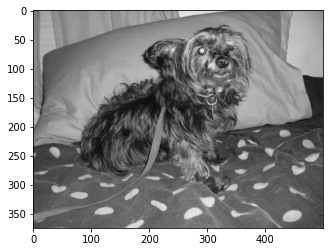

In [1]:
import numpy as np
import cv2 #basicamente para redimensionarmos imagens
import os
import matplotlib.pyplot as plt

DATADIR = r"C:\Users\kaiom\Desktop\cats and dogs\PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES: # para as categorias(cachorro ou gato) faremos o seguinte:
    path = os.path.join(DATADIR, category) #1° definir o caminho para o diretório dos miaus e catioros
    for img  in os.listdir(path): #2° vamos iterar sobre cada imagem em "cats" e cada imagem em "dogs" do dataset
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #3° converte-las num array
        plt.imshow(img_array, cmap="gray") #4° deixamos a imagem do array em escala de cinza, pois existe um problema
                                              #ao fazermos predições com imagens coloridas
        plt.show() #5° mostramos a imagem
        break
    break 

In [2]:
print(img_array.shape) ##verificando o tamnho da imagem (ou admirando um cachorrinho estranho)

(375, 500)


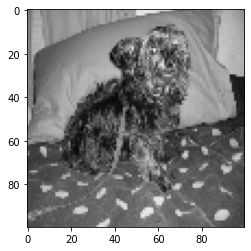

In [3]:
IMG_SIZE = 100 #usamos essa variavél para redimensionar as nossas imagens pois,
                #no dataset existem imagens com diversos tipos de dimensões

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #efetivamente redmiensionando as imagens para o tamanho acima
                                                        #importante estar atento á como o redimensionamento diminui a
                                                        #qualidade da imagem, então é bom achar um equilibrio entre
                                                        #qualidade da imagem processada e a capacidade de processamento
plt.imshow(new_array, cmap = "gray")
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in CATEGORIES:# para as categorias(cachorro ou gato) faremos o seguinte:
        path = os.path.join(DATADIR, category) #1° definir o diretório para o dataset
        class_num = CATEGORIES.index(category) #2° classificamos nossas imagens em 0 ou 1 sendo 0=catioros e 1=gatitos
        for img in os.listdir(path): #3° vamos iterar sobre cada imagem em "cats" e em "dogs" do dataset
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #4° converte-las num array e
                                                                                  #deixar ad imagens do array em escala
                                                                                  #de cinza, pois existe um problema
                                                                                  #ao fazermos predições com imagens coloridas e
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))#5° redmisionamos as imagens                                                       
                training_data.append([new_array, class_num]) #adicionamos tudo isso ao nosso training_data
            except Exception as e:
                pass
            
create_training_data()
print(len(training_data))

24946


In [5]:
import random
random.shuffle(training_data)

In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
0
1
1
0
0


In [7]:
X = []
y = []

In [8]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [11]:
X[1]

array([[[108],
        [105],
        [113],
        ...,
        [251],
        [252],
        [252]],

       [[106],
        [107],
        [105],
        ...,
        [251],
        [252],
        [252]],

       [[109],
        [108],
        [102],
        ...,
        [251],
        [252],
        [252]],

       ...,

       [[137],
        [134],
        [134],
        ...,
        [129],
        [131],
        [137]],

       [[133],
        [132],
        [135],
        ...,
        [143],
        [145],
        [147]],

       [[134],
        [133],
        [135],
        ...,
        [146],
        [148],
        [152]]], dtype=uint8)